In [19]:
import tskit
import msprime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
from utils import sleepy

# sleepy function

In [2]:
?sleepy

Signature:
sleepy(
    n_simulations: int = 1,
    num_generations: int = 100000000,
    N: int = 500,
    m: int = 100,
    b: float = 1,
    gc: int = 50,
    r: float = 5e-05,
    L: int = 10000,
    s: str = '1',
    d: str = '0.5',
    selection_position: str = '5000',
    selection_activation_generation: int = 100000,
    stop_after_mrca: bool = False,
    output_name: str = 'run',
    generations_post_fixation_threshold: int = 0,
    add_mutations_after_fixation: bool = True,
    output_directory: str = './',
    n_parallel: int = 10,
    continue_from: int = 0,
    print_cmd: bool = False,
    slurm=False,
    slurm_start=0,
    slurm_divide=2,
    slurm_limit=200,
) -> None
Docstring:
Python-wrapper for sleepy simulator bash script generation. Also, capable of
directly running simulations locally if print_cmd is false and slurm is false.

Arg types: 
    * **n_simulations** *(int)* - Number of simulations if script is directly to be run locally.
    * **num_generations** *(int

# Example

## no selection

In [2]:
%%time

sleepy(
    N=500,
    b=1.0,
    s=0,
    stop_after_mrca=True,
    output_directory="./germination_rate_b1/"
)

CPU times: user 10.4 ms, sys: 46 ms, total: 56.4 ms
Wall time: 1min 22s


''

In [3]:
%%time

sleepy(
    N=500,
    b=0.5,
    s=0,
    stop_after_mrca=True,
    output_directory="./germination_rate_b05/"
)

CPU times: user 4.17 ms, sys: 7.96 ms, total: 12.1 ms
Wall time: 1min 54s


''

## selection

In [4]:
%%time

sleepy(
    N=500,
    b=1.0,
    s=1,
    stop_after_mrca=False,
    output_directory="./germination_rate_b1_selection/"
)

CPU times: user 7.02 ms, sys: 5.97 ms, total: 13 ms
Wall time: 4min 7s


''

In [5]:
%%time

sleepy(
    N=500,
    b=0.5,
    s=1,
    stop_after_mrca=False,
    output_directory="./germination_rate_b05_selection/"
)

CPU times: user 8.5 ms, sys: 6.27 ms, total: 14.8 ms
Wall time: 5min


''

## plotting

In [10]:
ts_b1 = tskit.load("./germination_rate_b1_selection/run_0.trees"); ts_b1

In [6]:
ts_b05 = tskit.load("./germination_rate_b05_selection/run_0.trees"); ts_b05

In [8]:
def calculate_diversity_along_genome(ts):
    ts = msprime.sim_mutations(ts, rate=5e-5, discrete_genome=False, keep=False)
    windows = np.linspace(0, ts.sequence_length, 50) # window size 200
    diversity = ts.diversity(windows=windows, span_normalise=True, mode="site").tolist()
    return diversity

windows = np.linspace(0, 10_000, 50) # window size 200

Text(0.5, 1.0, 'b = 0.5')

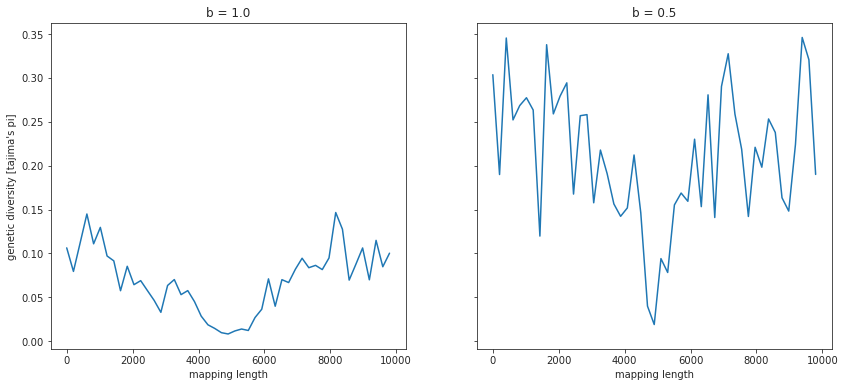

In [11]:
sns.set_style("ticks")
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.lineplot(x=windows[:-1], y=calculate_diversity_along_genome(ts_b1), ax=ax[0])
ax[0].set(xlabel="mapping length", ylabel="genetic diversity [tajima's pi]")
ax[0].set_title('b = 1.0')

sns.lineplot(x=windows[:-1], y=calculate_diversity_along_genome(ts_b05), ax=ax[1])
ax[1].set(xlabel="mapping length", ylabel="genetic diversity [tajima's pi]")
ax[1].set_title('b = 0.5')

In [15]:
sleepy(print_cmd=True, slurm=True, slurm_start=0, slurm_limit=200, slurm_divide=2)

for j in 0 100 ; do 
        sleepy  --num_generations 100000000 --N 500 --m 100 --b 1 --gc 50 --r 5e-05 --L 10000 --selection_coefficient 1 --dominance_coefficient 0.5 --selection_position 5000 --selection_activation_generation 100000 --stop_after_mrca False --debug_print False --output_name run_$(($i+$j)) --output_directory ./ --generations_post_fixation_threshold 0 --add_mutations_after_fixation True 
        done


## slurm header and bash script from above

```console

#!/bin/bash

#SBATCH --job-name=array  
#SBATCH --output=./log/array_%A_%a.out  
#SBATCH --error=./log/array_%A_%a.err  
#SBATCH --array=0-99  
#SBATCH --clusters=serial  
#SBATCH --partition=serial_std  
#SBATCH --get-user-env  
#SBATCH --time=72:00:00  
#SBATCH --ntasks=1  
#SBATCH --mem=5000mb  

conda activate sleepy

i=$SLURM_ARRAY_TASK_ID

for j in 0 100 ; do   
    sleepy  --num_generations 100000000 --N 500 --m 100 --b 1 --gc 50 --r 5e-05 --L 10000 --selection_coefficient 1 --dominance_coefficient 0.5 --selection_position 5000 --selection_activation_generation 100000 --stop_after_mrca False --debug_print False --output_name run_$(($i+$j)) --output_directory ./ --generations_post_fixation_threshold 0 --add_mutations_after_fixation True      
        done     
```


# print script which rans locally:

In [16]:
sleepy(print_cmd=True, slurm=False)



            n_simulations=1
            n_prog=10
            n_prog_count=0

            i=0
            while [[ $i -lt $n_simulations ]]; do

            sleepy --num_generations 100000000 --N 500 --m 100 --b 1 --gc 50 --r 5e-05 --L 10000 --selection_coefficient 1 --dominance_coefficient 0.5 --selection_position 5000 --selection_activation_generation 100000 --stop_after_mrca False --debug_print False --output_name run_$i --output_directory ./ --generations_post_fixation_threshold 0 --add_mutations_after_fixation True  &
                 (( n_prog_count+=1 ))  
                 [[ $((n_prog_count%n_prog)) -eq 0 ]] && wait
                 (( i+=1 ))
            done
            
